# 数据探索

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100

In [57]:
data_path="../data/train.csv"
data=pd.read_csv(data_path)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
survived_data=data[data['Survived']==1]
survived_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


## 1、尝试从性别分析

In [63]:
male_data=data[data['Sex']=='male']
female_data=data[data['Sex']=='female']
male_survived_rate=len(male_data[male_data['Survived']==1])/len(male_data)
female_survived_rate=len(female_data[female_data['Survived']==1])/len(female_data)
print("男性：",male_survived_rate,'\n')
print("女性：",female_survived_rate)


男性： 0.18890814558058924 

女性： 0.7420382165605095


结论：女性生存率远高于男性，因此性别是重要特征

## 2、从登船地分析

In [64]:
in_C= data[data['Embarked']=='C']
in_Q= data[data['Embarked']=='Q']
in_S= data[data['Embarked']=='S']
C_survived_rate=len(in_C[in_C['Survived']==1])/len(in_C)
Q_survived_rate=len(in_Q[in_Q['Survived']==1])/len(in_Q)
S_survived_rate=len(in_S[in_S['Survived']==1])/len(in_S)
print("C登船生存率：",C_survived_rate)
print("Q登船生存率：",Q_survived_rate)  
print("S登船生存率：",S_survived_rate)

C登船生存率： 0.5535714285714286
Q登船生存率： 0.38961038961038963
S登船生存率： 0.33695652173913043


结论：c点生存率显著偏高，而q点略高于s点，差别不大。可以作为特征，使用目标编码。

## 3、从船票价格分析

### 3.1、船票价格分布

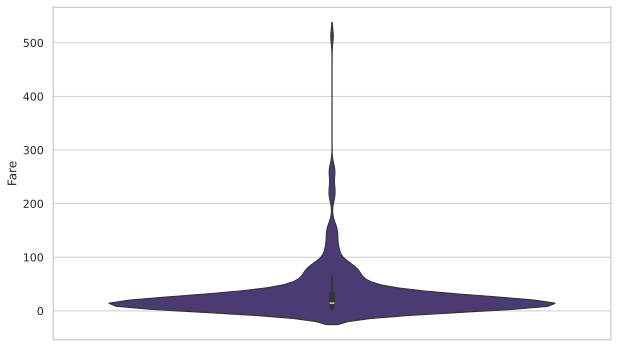

In [65]:
sns.set_theme(style='whitegrid',palette='viridis')
sns.violinplot(y='Fare', data=data)
plt.show()

可以发现低价船票占了绝大部分，因此尝试做一个对数变换

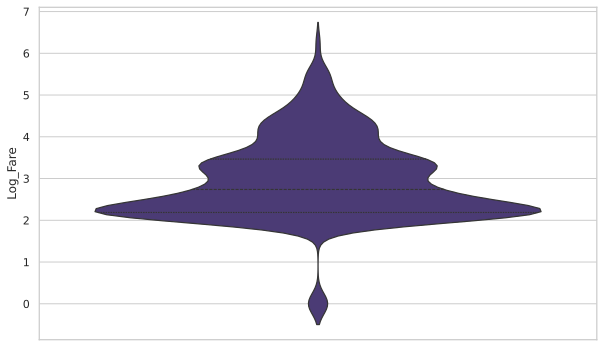

In [66]:
log_fare = np.log(data['Fare']+1)
data['Log_Fare'] = log_fare
sns.violinplot(y='Log_Fare', data=data,inner='quartile')
plt.show()

### 3.2生还者和遇难者的票价分布

遇难者票价：
 count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64 
生还者票价：
 count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


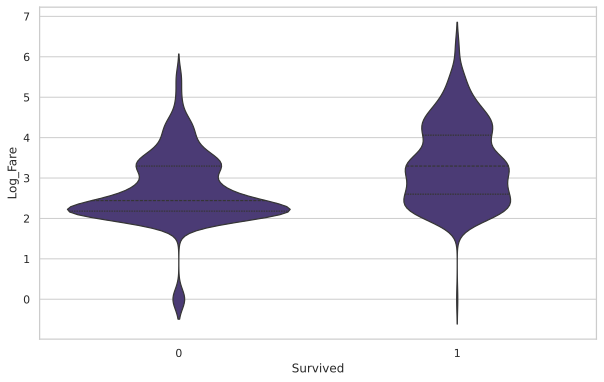

In [71]:
sns.violinplot(x='Survived',y='Log_Fare', data=data,inner='quartile',order=[0,1])
print("遇难者票价：\n",data[data['Survived']==0]['Fare'].describe(),'\n'
      "生还者票价：\n",data[data['Survived']==1]['Fare'].describe())
plt.show()

我们发现有一部分票价为0的人，写出来看看

In [80]:
free_ticket=data[data['Fare']==0]
print("免费票人数为",len(free_ticket),'\n')
free_ticket.head(15)


免费票人数为 15 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_Fare,fare_bin,count_for_each_bin,survived_for_each_bin,survival_rate
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0.0,"(-0.001, 2.107]",55,6,0.109091
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0.0,"(-0.001, 2.107]",55,6,0.109091


他们无一例外都是从s港口登船的，全部都是男性，没有一起登船的人，且仅有一人存活。因此这一系列特征组合基本判了一个人死刑。

可以发现，存活组的每一个四分位数都显著高于遇难组。这说明票价高意味着更高的存活率。接下来我们从价格区间存活率方面来说明这个结论

In [82]:
print(data[data['Fare'].isna()==1])#价格部分没有缺失值


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Log_Fare, fare_bin, count_for_each_bin, survived_for_each_bin, survival_rate]
Index: []


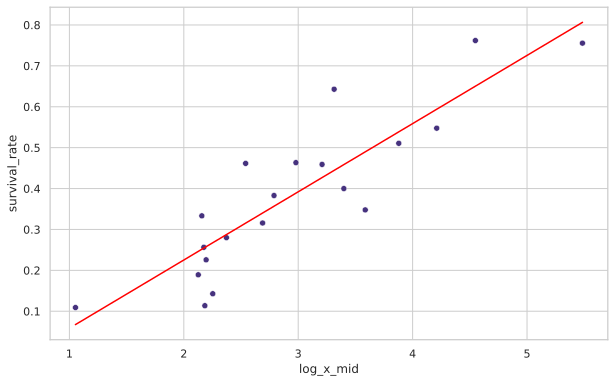

线性回归模型系数： 0.16674862274336807 截距： -0.10813591592112004 R^2= 0.777754058553328


In [84]:
data['fare_bin']=pd.qcut(data['Log_Fare'],q=20)
data['count_for_each_bin']=data.groupby('fare_bin',observed=False)['fare_bin'].transform('count')#计算每个票价区间的人数
data['survived_for_each_bin']=data.groupby('fare_bin',observed=False)['Survived'].transform('sum')#计算每个票价区间的存活人数
data['survival_rate']=data['survived_for_each_bin']/data['count_for_each_bin']
fare_survival_rate=data[['fare_bin','survival_rate']].drop_duplicates().sort_values(by='fare_bin')#每个票价区间的存活率，去重并排序
fare_survival_rate['log_x_mid']=fare_survival_rate['fare_bin'].apply(lambda x: x.mid)#计算票价区间的中点值
sns.scatterplot(x='log_x_mid',y='survival_rate',data=fare_survival_rate)#在图中我们可以发现，票价越高，存活率越高，做一个线性回归拟合
from sklearn.metrics import r2_score
model=LinearRegression()
X=fare_survival_rate['log_x_mid'].values.reshape(-1,1)
y=fare_survival_rate['survival_rate'].values
model.fit(X,y)
y_pred=model.predict(X)
plt.plot(fare_survival_rate['log_x_mid'],y_pred,color='red')
plt.show()
print("线性回归模型系数：",model.coef_[0],"截距：",model.intercept_,'R^2=',r2_score(y,model.predict(X)))


小结：我们发现票价呈现了集中在低价，少部分高价的特点，且生还率随票价上升而上升，生存率关于票价对数有强相关性。此外还发现了免费票几乎无人生还。